## **Project: Clustering on cancer genome**
- **Source**: The Cancer Genome Atlas (TCGA) Pan-Cancer dataset on UCI
- **URL**: https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq
- **Date**: 28/02/25
- **Goal**: Create a basic clustering model

In [1]:
import logging
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import (
    PCA,
    FastICA
)
from sklearn.cluster import KMeans
from sklearn.manifold import (
    MDS,
    TSNE
)
from sklearn.datasets import load_iris
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
# data cancer
#df_raw = pd.read_csv('/content/TCGA_data.csv')
#df_raw.info()

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = X
df_raw['species'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df_raw.sample(10, random_state=2025)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2
112,6.8,3.0,5.5,2.1,2
132,6.4,2.8,5.6,2.2,2
0,5.1,3.5,1.4,0.2,0
113,5.7,2.5,5.0,2.0,2
34,4.9,3.1,1.5,0.2,0
51,6.4,3.2,4.5,1.5,1
135,7.7,3.0,6.1,2.3,2
5,5.4,3.9,1.7,0.4,0


In [5]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.replace("(", "").str.replace(")", "").str.replace(" ", "_")
df_baking['species'] = df_baking['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_baking['species'] = df_baking['species'].astype("category")
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sepal_length_cm  150 non-null    float64 
 1   sepal_width_cm   150 non-null    float64 
 2   petal_length_cm  150 non-null    float64 
 3   petal_width_cm   150 non-null    float64 
 4   species          150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [6]:
df_train, df_test =  train_test_split(df, test_size=0.2, stratify=df['species'], random_state=2025)
df_train

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
100,6.3,3.3,6.0,2.5,virginica
5,5.4,3.9,1.7,0.4,setosa
121,5.6,2.8,4.9,2.0,virginica
136,6.3,3.4,5.6,2.4,virginica
126,6.2,2.8,4.8,1.8,virginica
...,...,...,...,...,...
72,6.3,2.5,4.9,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
87,6.3,2.3,4.4,1.3,versicolor
47,4.6,3.2,1.4,0.2,setosa


In [7]:
df_train, df_test =  train_test_split(df, test_size=0.2, stratify=df['species'], random_state=2025)
X_train = df_train.drop(columns=['species']).reset_index(drop=True)
y_train = df_train['species'].reset_index(drop=True)
X_test = df_test.drop(columns=['species']).reset_index(drop=True)
y_test = df_test['species'].reset_index(drop=True)
X_train

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,6.3,3.3,6.0,2.5
1,5.4,3.9,1.7,0.4
2,5.6,2.8,4.9,2.0
3,6.3,3.4,5.6,2.4
4,6.2,2.8,4.8,1.8
...,...,...,...,...
115,6.3,2.5,4.9,1.5
116,7.6,3.0,6.6,2.1
117,6.3,2.3,4.4,1.3
118,4.6,3.2,1.4,0.2


In [8]:
df_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,120.0,5.830000,0.814119,4.3,5.100,5.8,6.4,7.9
sepal_width_cm,120.0,3.054167,0.436159,2.0,2.800,3.0,3.4,4.4
petal_length_cm,120.0,3.753333,1.766016,1.1,1.575,4.4,5.1,6.9
petal_width_cm,120.0,1.203333,0.760355,0.1,0.300,1.3,1.8,2.5


In [9]:
pca_ = PCA(n_components=4,random_state=2025)
X_train_pca = pca_.fit_transform(X_train)

In [10]:
pca_.explained_variance_

array([4.20397454, 0.24501334, 0.07700038, 0.02398863])

In [11]:
pca_.explained_variance_ratio_

array([0.92395514, 0.05384936, 0.01692325, 0.00527225])

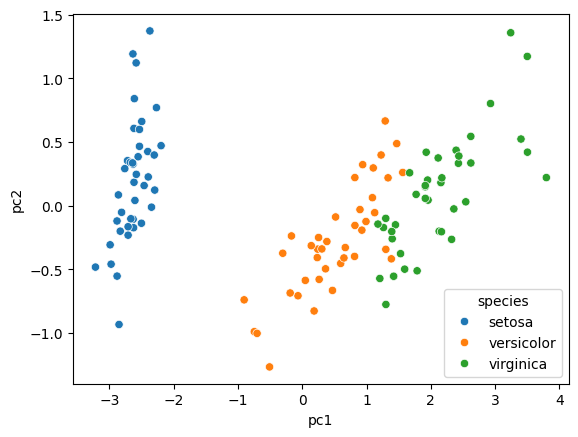

In [12]:
df_X_train_pca = pd.DataFrame(X_train_pca,columns=['pc1','pc2','pc3','pc4'])
df_X_train_pca['species'] = y_train
sns.scatterplot(df_X_train_pca, x='pc1', y='pc2', hue='species')
plt.show()

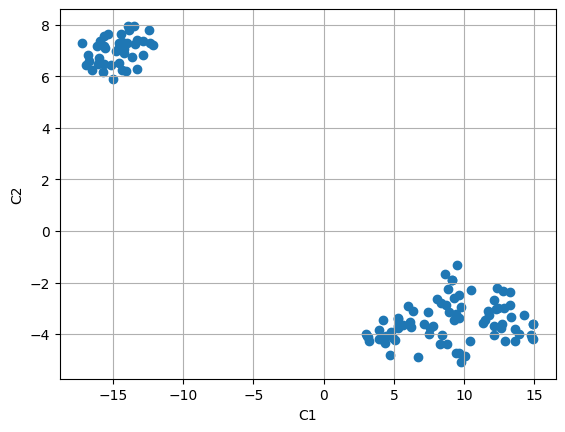

In [13]:
tsne_ = TSNE(n_components=2, random_state=2025)
X_train_tsne = tsne_.fit_transform(X_train)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.grid(True)
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()

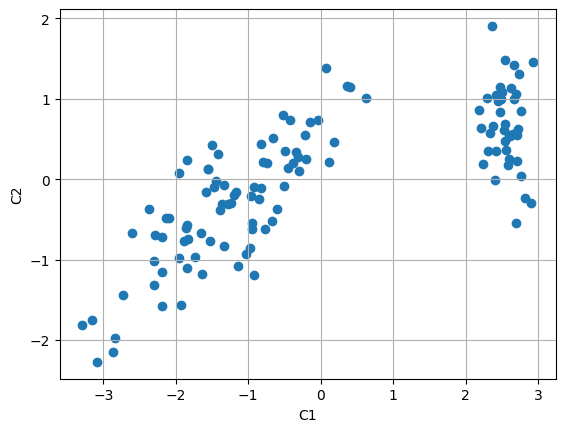

In [14]:
mds_ = MDS(n_components=2, random_state=2025)
X_train_mds = mds_.fit_transform(X_train)
plt.scatter(X_train_mds[:,0], X_train_mds[:,1])
plt.grid(True)
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()

In [15]:
clu_km_p = Pipeline([
    ("scaler", MinMaxScaler()),
    ("k_means", KMeans(n_clusters=3))
])

In [16]:
clu_km_p.fit(X_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('k_means', KMeans(n_clusters=3))])

In [17]:
y_train_km = clu_km_p.predict(X_train)
y_train_km


array([2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 0, 0, 2, 0, 1, 2], dtype=int32)

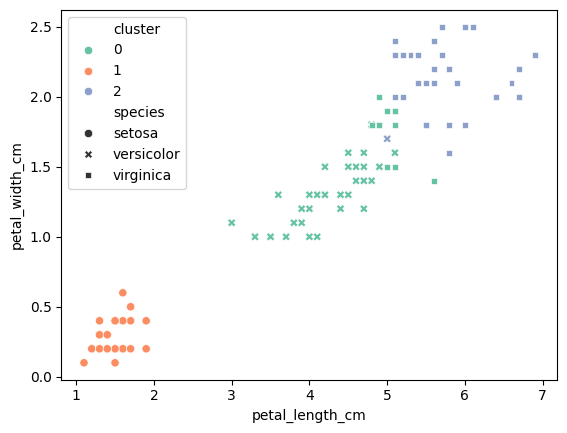

In [18]:
df_clu = X_train
df_clu['cluster'] = y_train_km
df_clu['species'] = y_train
sns.scatterplot(df_clu,x=X_train['petal_length_cm'], y=X_train['petal_width_cm'], hue= 'cluster', style='species',palette='Set2')
plt.show()